<img src="https://gist.githubusercontent.com/nesnoj/6ee605cd3494fa6e3e848385c4afbe19/raw/a883b1bdc69c0c5bbb0b00ba92f43033aa86ec64/dingo_model.png" alt="DINGO Model" width="800"  align="center">

In [1]:
%%capture

from ding0.core import NetworkDing0
from ding0.tools.logger import setup_logger
from ding0.tools.results import save_nd_to_pickle
from ding0.tools.plots import plot_mv_topology
from egoio.tools import db
from sqlalchemy.orm import sessionmaker
import oedialect

from ding0.tools import results


# create new network
nd = NetworkDing0(name='network')



# set ID of MV grid district
mv_grid_districts = [40] # fn

In [2]:
engine = db.connection(section='oedb_dialect', readonly=True)
session = sessionmaker(bind=engine)()

In [3]:
ding0_default=False

In [4]:
from grid.lv_grid.routing import build_graph_from_ways

In [5]:
import networkx as nx

In [6]:
ways = nd.import_mv_grid_districts(session, ding0_default, mv_grid_districts_no=mv_grid_districts)

In [7]:
nx.__version__

'2.5.1'

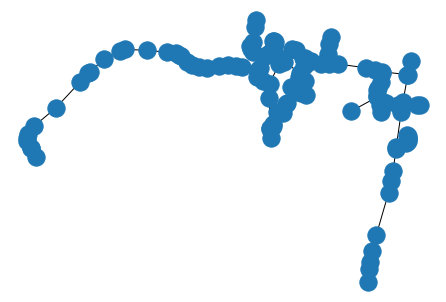

In [8]:
graph, node_coords_dict = build_graph_from_ways(ways)
nx.draw(graph, node_coords_dict)

In [9]:
load_from_pkl=True

if load_from_pkl:
    
    print('LOAD DING0 GRID FROM PKL')

    grid_id=40
    nd = results.load_nd_from_pickle(filename='./config/tmp/ding0_grids__' + str(grid_id) + '.pkl')
    
    # should be closed before export
    nd.control_circuit_breakers(mode='open')


else:
    
    print('DING0.RUN()')
    
    nd.import_mv_grid_districts(session, ding0_default, mv_grid_districts, need_parameterization)
    nd.import_generators(session)

    nd.mv_parametrize_grid()
    nd.validate_grid_districts()
    
    build_lv_grid_default=True

    if build_lv_grid_default:

        nd.build_lv_grids()

    else:

        print('IMPLEMENT_MY_ROUTING')
        
        
    nd.mv_routing()
    
    nd.connect_generators()
    #nd.set_branch_ids()
    nd.set_circuit_breakers()
    
    
    nd.control_circuit_breakers(mode='open')
    nd.run_powerflow(session)
    
    nd.reinforce_grid()
    
    
    
    #nd.control_circuit_breakers(mode='close')
    #save_nd_to_pickle(nd, filename='ding0_grids__40.pkl')

LOAD DING0 GRID FROM PKL


In [10]:
import networkx as nx # to enable nx.draw()
import pandas as pd
from sqlalchemy import func              # check
from geoalchemy2.shape import to_shape 
from shapely.wkt import loads

In [11]:
from config.config_lv_grids_osm import get_config_osm     # check
from config.db_conn_local import create_session_osm       # check
from config.classes_db_conn.osm_load_classes import Buildings_with_Amenities, Building_wo_Amenity, Amenities_ni_Buildings, Way # check

In [12]:
from grid.lv_grid.routing import build_graph_from_ways, nearest_nodes, get_location_substation_at_pi
from grid.lv_grid.parameterization import parameterize_by_load_profiles
from grid.lv_grid.clustering import get_n_cluster, cluster_k_means

In [13]:
from grid.lv_grid.geo import get_Point_from_x_y, get_points_in_load_area, get_convex_hull_from_points

In [14]:
session_osm = create_session_osm() # check

In [15]:
# FOR TESTING REASONS SELECT ONE LOAD_AREA (Fallenbrunnen) BY ID
id_load_area_fallenbrunnen = '4544'

load_areas = []


for mv_grid_district in nd.mv_grid_districts():
    for load_area in mv_grid_district.lv_load_areas():
        
        
        if not load_area.is_aggregated:
                
            if id_load_area_fallenbrunnen in str(load_area):
                
                fn_fallenbrunnen_la  = load_area
                fn_fallenbrunnen_geo = fn_fallenbrunnen_la.geo_area
                
                #for lv_district in fn_fallenbrunnen_la._lv_grid_districts:
                # does not work due to one districtr has 1 lv station where trafo is located
            
                print('build a lv grid for ', str(load_area))
                print('peak_load by ding0', load_area.peak_load)
                print('STARTING SYNTHESIZING LV GRIDS FOR load_area')

                print('CALL')

                print('SYNTHESIZING LV GRIDS for LA TERMINATED')
                
                
        # if only is_aggregated
        #    indent
        load_areas.append(load_area)
                                
                

build a lv grid for  lv_load_area_4544
peak_load by ding0 27.9485612387548
STARTING SYNTHESIZING LV GRIDS FOR load_area
CALL
SYNTHESIZING LV GRIDS for LA TERMINATED


In [16]:
type(fn_fallenbrunnen_la._lv_grid_districts[0])

ding0.core.structure.regions.LVGridDistrictDing0

In [17]:
fn_fallenbrunnen_la._lv_grid_districts[0].__dict__

{'id_db': 4563,
 'geo_data': <shapely.geometry.multipolygon.MultiPolygon at 0x21bdc74bf10>,
 'lv_load_area': lv_load_area_4544,
 'lv_grid': lv_grid_4563,
 'population': 80,
 'peak_load_residential': 27.9485612387548,
 'peak_load_retail': 0.0,
 'peak_load_industrial': 0.0,
 'peak_load_agricultural': 0.0,
 'peak_load': 27.9485612387548,
 'sector_count_residential': 1,
 'sector_count_retail': 0,
 'sector_count_industrial': 0,
 'sector_count_agricultural': 0,
 'sector_consumption_residential': 130771.856816184,
 'sector_consumption_retail': 0.0,
 'sector_consumption_industrial': 0.0,
 'sector_consumption_agricultural': 0.0}

In [18]:
fn_fallenbrunnen_la.id_db

4544

In [19]:
fn_fallenbrunnen_geo = fn_fallenbrunnen_la.geo_area

In [20]:
#fn_fallenbrunnen_geo.wkt

In [21]:
from shapely import geometry

In [22]:
# schnetzenhausen geo
G_east  = 9.4467
G_south = 47.6718
G_north = 47.6790
G_west  = 9.4341

p1 = geometry.Point(G_east,G_south)
p2 = geometry.Point(G_east,G_north)
p3 = geometry.Point(G_west,G_north)
p4 = geometry.Point(G_west,G_south)

pointList = [p1, p2, p3, p4, p1]

area_of_interest = geometry.Polygon([[p.x, p.y] for p in pointList])

area_of_interest.wkt

'POLYGON ((9.4467 47.6718, 9.4467 47.679, 9.434100000000001 47.679, 9.434100000000001 47.6718, 9.4467 47.6718))'

In [23]:
# load ways and buildings...

### Load bays
#ways = session_osm.query(Way).filter(func.st_intersects(func.ST_GeomFromText(fn_fallenbrunnen_geo.wkt, get_config_osm('srid')), Way.geometry)) 
ways = session_osm.query(Way).filter(func.st_intersects(func.ST_GeomFromText(area_of_interest.wkt, get_config_osm('srid')), Way.geometry)) 


graph, node_coords_dict = build_graph_from_ways(ways)
#nx.draw(graph, node_coords_dict)


### Load buildings_w_a
#buildings_w_a = session_osm.query(Buildings_with_Amenities).filter(func.st_intersects(func.ST_GeomFromText(fn_fallenbrunnen_geo.wkt, get_config_osm('srid')), Buildings_with_Amenities.geometry_amenity)) 
buildings_w_a = session_osm.query(Buildings_with_Amenities).filter(func.st_intersects(func.ST_GeomFromText(area_of_interest.wkt, get_config_osm('srid')), Buildings_with_Amenities.geometry_amenity)) 

### Load buildings_wo_a
#buildings_wo_a = session_osm.query(Building_wo_Amenity).filter(func.st_intersects(func.ST_GeomFromText(fn_fallenbrunnen_geo.wkt, config_osm['srid']), Building_wo_Amenity.geometry)) 
buildings_wo_a = session_osm.query(Building_wo_Amenity).filter(func.st_intersects(func.ST_GeomFromText(area_of_interest.wkt, get_config_osm('srid')), Building_wo_Amenity.geometry)) 

### Load buildings_wo_a
#amenities_ni_Buildings = session_osm.query(Amenities_ni_Buildings).filter(func.st_intersects(func.ST_GeomFromText(fn_fallenbrunnen_geo.wkt, config_osm['srid']), Amenities_ni_Buildings.geometry)) 
amenities_ni_Buildings = session_osm.query(Amenities_ni_Buildings).filter(func.st_intersects(func.ST_GeomFromText(area_of_interest.wkt, get_config_osm('srid')), Amenities_ni_Buildings.geometry)) 


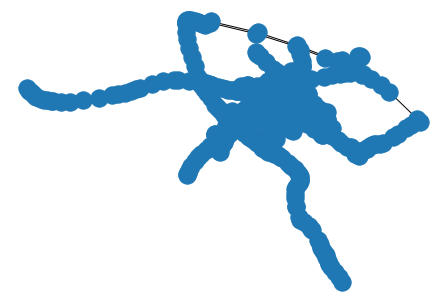

In [24]:
nx.draw(graph, node_coords_dict)

#### ADD LOADS and ASSIGN NN

In [25]:
%%time

# parameterization
buildings_w_loads_df = parameterize_by_load_profiles(buildings_w_a, buildings_wo_a, amenities_ni_Buildings)

# adding nearest nodes
X = buildings_w_loads_df['x'].tolist()
Y = buildings_w_loads_df['y'].tolist()
    
buildings_w_loads_df['nn'], buildings_w_loads_df['nn_dist'] = nearest_nodes(graph, X, Y)

Wall time: 1.3 s


In [26]:
buildings_w_loads_df.head()

category    capacity     area number_households         x  \
osm_id                                                                          
5175135665  place_of_worship   10.000000      100                 0   9.44044   
1576076796               pub   60.977231  666.345               3.4  9.441255   
3461383409        restaurant  150.911429  3298.25              2.16  9.441726   
8598838279         ice_cream   20.966863  229.121          0.645161  9.437183   
143475111        residential    0.427118      100              0.25  9.442517   

                    y                                           geometry  \
osm_id                                                                     
5175135665  47.678088                POINT (9.4404395 47.67808800001318)   
1576076796  47.675475  POLYGON ((9.4410905 47.67549720001377, 9.44114...   
3461383409  47.675793  POLYGON ((9.441379400000001 47.67584520001369,...   
8598838279  47.674769  POLYGON ((9.437094099999998 47.67477800001394,...   
143475111   47.676217  POLYGON ((9.4421704 47.67620580001361, 9.44254...   

                                           raccordement          nn    nn_dist  
osm_id                                                                          
5175135665          POINT (9.4404395 47.67808800001318)  2081001741   7.859250  
1576076796  POINT (9.441254552977929 47.67547454660144)  1863459034  17.760880  
3461383409  POINT (9.441725733550514 47.67579283860851)  2457005968  30.049377  
8598838279  POINT (9.437183076702567 47.67476938145773)   475940044  19.021132  
143475111   POINT (9.442516566727749 47.67621714946911)  3461383425  29.441108

In [31]:
buildings_w_loads_df.to_csv('buildings_w_loads_df_schnetzenhausen.csv')

### Clustering

In [27]:
n_clusters = get_n_cluster(buildings_w_loads_df)
if n_clusters < len(fn_fallenbrunnen_la._lv_grid_districts):
    n_clusters = len(fn_fallenbrunnen_la._lv_grid_districts)
buildings_w_loads_df = cluster_k_means(buildings_w_loads_df, n_clusters)

In [29]:
n_clusters

3

### Update and add _districts

In [30]:
for i in range(n_clusters):
    
    print(len(buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==i)]))


99
85
79


In [28]:
buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==0)]

category    capacity     area number_households         x  \
osm_id                                                                         
8598838279        ice_cream   20.966863  229.121          0.645161  9.437183   
144020300   public_building  244.695822  2113.09            0.8125  9.438239   
144023114            school  102.108142  1641.61          0.552632  9.438521   
314909001       residential    1.246721      100           0.72973   9.43711   
314909020             house    1.102239      100          0.645161  9.437548   
...                     ...         ...      ...               ...       ...   
314913916       residential    2.904399      100               1.7  9.436301   
338514542            school  407.558658  6552.39          0.594203  9.438414   
401560706       residential    1.102239      100          0.645161   9.43769   
427999640       residential    1.017812      100          0.595745  9.437456   
428000222       residential    2.628415      100          1.538462  9.436665   

                    y                                           geometry  \
osm_id                                                                     
8598838279  47.674769  POLYGON ((9.437094099999998 47.67477800001394,...   
144020300   47.675506  POLYGON ((9.437905999999998 47.67551250001376,...   
144023114   47.673818  POLYGON ((9.438203599999998 47.67375600001416,...   
314909001   47.674319  POLYGON ((9.4370154 47.67431780001401, 9.43711...   
314909020   47.674401  POLYGON ((9.4374646 47.674413400014, 9.4375446...   
...               ...                                                ...   
314913916   47.672468  POLYGON ((9.436173800000001 47.67246730001447,...   
338514542   47.673881  POLYGON ((9.437957300000001 47.67387860001414,...   
401560706   47.674448  POLYGON ((9.4376228 47.674467300014, 9.4377058...   
427999640   47.673842  POLYGON ((9.4373962 47.67383920001416, 9.43741...   
428000222   47.673556  POLYGON ((9.436553399999999 47.67355130001422,...   

                                           raccordement          nn  \
osm_id                                                                
8598838279  POINT (9.437183076702567 47.67476938145773)   475940044   
144020300   POINT (9.438238891069723 47.67550616796044)  1576023053   
144023114   POINT (9.438521488700175 47.67381754064048)    68844093   
314909001   POINT (9.437109750000001 47.67431900001404)  2080880814   
314909020   POINT (9.437548450000001 47.67440130001403)   314975344   
...                                                 ...         ...   
314913916   POINT (9.436301343479869 47.67246766666069)   311379901   
338514542   POINT (9.438414351486788 47.67388107322754)    68844093   
401560706   POINT (9.437690147469656 47.67444791593603)   314975344   
427999640   POINT (9.437456201491505 47.67384173088283)  1863458994   
428000222   POINT (9.436665109007034 47.67355583574013)  2080880811   

              nn_dist  Cluster  
osm_id                          
8598838279  19.021132        0  
144020300   34.831012        0  
144023114   33.677840        0  
314909001   14.638173        0  
314909020   15.374000        0  
...               ...      ...  
314913916   30.431139        0  
338514542   31.901109        0  
401560706   27.030240        0  
427999640   21.084569        0  
428000222   34.390889        0  

[99 rows x 11 columns]

In [16]:
%%time

geometry = buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==0), 'geometry'].tolist()

points = get_points_in_load_area(geometry)
        
len(points)

Wall time: 9.38 ms


140

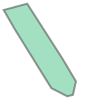

In [17]:
get_convex_hull_from_points(points)

In [24]:
fn_fallenbrunnen_la.lv_load_area_group.__dict__

{'id_db': 20,
 'mv_grid_district': mv_grid_district_40,
 '_lv_load_areas': [lv_load_area_4544,
  lv_load_area_4545,
  lv_load_area_4548,
  MVCableDist_mvgd_40_26],
 'peak_load': 65.35928151751943,
 'branch_length_sum': 0,
 'peak_load_max': 1000.0,
 'branch_length_max': 2000.0,
 'root_node': MVCableDist_mvgd_40_23}

In [28]:
nd._mv_grid_districts[0].__dict__

{'id_db': 40,
 'mv_grid': mv_grid_40,
 '_lv_load_areas': [lv_load_area_2128,
  lv_load_area_2292,
  lv_load_area_2383,
  lv_load_area_2520,
  lv_load_area_2521,
  lv_load_area_2561,
  lv_load_area_2608,
  lv_load_area_2625,
  lv_load_area_2633,
  lv_load_area_2705,
  lv_load_area_2728,
  lv_load_area_2763,
  lv_load_area_2765,
  lv_load_area_2840,
  lv_load_area_2842,
  lv_load_area_3029,
  lv_load_area_3088,
  lv_load_area_3089,
  lv_load_area_3119,
  lv_load_area_3160,
  lv_load_area_3235,
  lv_load_area_3277,
  lv_load_area_3304,
  lv_load_area_3305,
  lv_load_area_3307,
  lv_load_area_3311,
  lv_load_area_3314,
  lv_load_area_3403,
  lv_load_area_3413,
  lv_load_area_3645,
  lv_load_area_3661,
  lv_load_area_3731,
  lv_load_area_3780,
  lv_load_area_3805,
  lv_load_area_3911,
  lv_load_area_3986,
  lv_load_area_3987,
  lv_load_area_3992,
  lv_load_area_4212,
  lv_load_area_4337,
  lv_load_area_4347,
  lv_load_area_4487,
  lv_load_area_4488,
  lv_load_area_4544,
  lv_load_area_4545,

In [17]:
fn_fallenbrunnen_la._lv_grid_districts[0].lv_grid._station.__dict__

{'id_db': 4563,
 'geo_data': <shapely.geometry.point.Point at 0x118800eba90>,
 'grid': lv_grid_4563,
 '_transformers': [Transformer_lv_grid_4563_1],
 'v_level_operation': None,
 'lv_load_area': lv_load_area_4544,
 'voltage_res': [0.9897135909377942, 1.0123145234795161]}

In [17]:
preprocessed_clusters = []   
    

for cluster_id in range(n_clusters):
    
    if cluster_id < len(fn_fallenbrunnen_la._lv_grid_districts):
        
        print('delete or update _lv_grid_districts[', cluster_id, ']')
        
        # GET NEW VALUES FOR DISTRICT        
        # get convex hull of cluster
        points = get_points_in_load_area(buildings_w_loads_df.loc[buildings_w_loads_df['Cluster']==cluster_id])
        district_convex_hull = get_convex_hull_from_points(points)
        
        # get location of substation for cluster
        station_x, station_y = get_location_substation_at_pi(graph, buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==0)])

        
        # UPDATE VALUES
        # update values of _lv_grid_districts[cluster_id]
        fn_fallenbrunnen_la._lv_grid_districts[cluster_id].geo_data  = district_convex_hull
        fn_fallenbrunnen_la._lv_grid_districts[cluster_id].poulation = buildings_w_loads_df.loc[buildings_w_loads_df['Cluster']==cluster_id]['number_households'].sum()
        
        fn_fallenbrunnen_la._lv_grid_districts[cluster_id].peak_load = buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==0)]['capacity'].sum()
        fn_fallenbrunnen_la._lv_grid_districts[cluster_id].peak_load_residential = buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==cluster_id) & buildings_w_loads_df['number_households'] > 0]['capacity'].sum()
        
        
        # ADD / RESET DING0 ELEMENTS
        # update position of substation
        fn_fallenbrunnen_la._lv_grid_districts[0].lv_grid._station.geo_data = get_Point_from_x_y(station_x, station_y)
        
        # reset list to add new elements
        fn_fallenbrunnen_la._lv_grid_districts[cluster_id].lv_grid._station.transformers.clear()
        
        
        # update trafo and loads
        #fn_fallenbrunnen_la._lv_grid_districts[cluster_id].lv_grid.build_grid()
        
        
    else:
        
        print('add _lv_grid_districts id', cluster_id)
        
        
        
        
        
    break
    

update _lv_grid_districts 0
add _lv_grid_districts id 1
add _lv_grid_districts id 2


In [21]:
fn_fallenbrunnen_la._lv_grid_districts[0].lv_grid._station.__dict__

{'id_db': 4563,
 'geo_data': <shapely.geometry.point.Point at 0x1d50cd257f0>,
 'grid': lv_grid_4563,
 '_transformers': [Transformer_lv_grid_4563_1],
 'v_level_operation': None,
 'lv_load_area': lv_load_area_4544,
 'voltage_res': [0.9897135909377942, 1.0123145234795161]}

In [19]:
#lv_district_of_interest.lv_grid.graph_draw(mode='LV')

In [16]:
lv_district_of_interest.lv_grid.__dict__ # .geo_data.wkt

NameError: name 'lv_district_of_interest' is not defined

In [19]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [20]:
X = []    # collect nodes

for node in graph.nodes:

    X.append([graph.nodes[node]['X'], graph.nodes[node]['Y']])
    
    
X = np.array(X)



# clustering

adj_mat_sparse = nx.adjacency_matrix(graph, weight='length')

clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=adj_mat_sparse).fit(X)






# assign cluster labels

i_label = 0

for node in list(graph.nodes):

    graph.nodes[node]['cluster'] = clustering.labels_[i_label]
    
    i_label += 1
    
labels = nx.get_node_attributes(graph, 'cluster') 

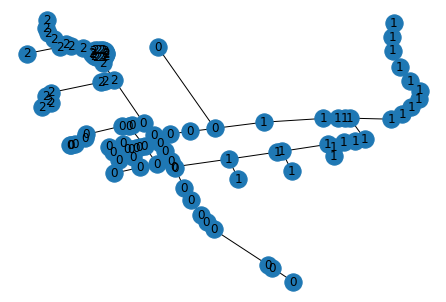

In [23]:
nx.draw(graph, node_coords_dict,labels=labels)

In [24]:
X = []    # collect nodes

for node in graph.nodes:

    X.append([graph.nodes[node]['X'], graph.nodes[node]['Y']])
    
    
X = np.array(X)



# clustering

adj_mat_sparse = nx.to_numpy_matrix(graph, weight='length')

clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=adj_mat_sparse).fit(X)






# assign cluster labels

i_label = 0

for node in list(graph.nodes):

    graph.nodes[node]['cluster'] = clustering.labels_[i_label]
    
    i_label += 1
    
labels = nx.get_node_attributes(graph, 'cluster') 

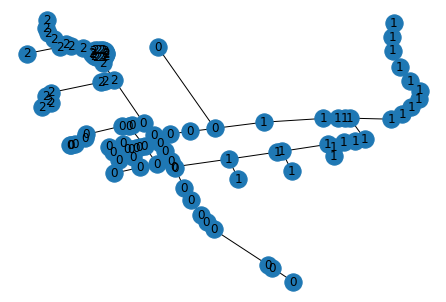

In [25]:
nx.draw(graph, node_coords_dict,labels=labels)